# Growing Degree Days

Цей блокнот завантажує дані про температуру, збережені у файлі CSV, і аналізує їх. Він будує графік температур, показує найвище та найнижче значення для кожного дня та обчислює GDD.

Щоб використовувати цей блокнот:

* Скопіюйте файл `temperature.csv` у ту саму папку, що й цей блокнот
* Запустіть усі клітинки за допомогою кнопки **▶︎ Виконати** вище. Це запустить вибрану клітинку, а потім перейде до наступної.

У комірці нижче встановіть `base_temperature` базову температуру рослини.

In [1]:
base_temperature = 49

Тепер файл CSV потрібно завантажити за допомогою pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the temperature CSV file
df = pd.read_csv('temperature.csv')

Тепер температуру можна відобразити на графіку.

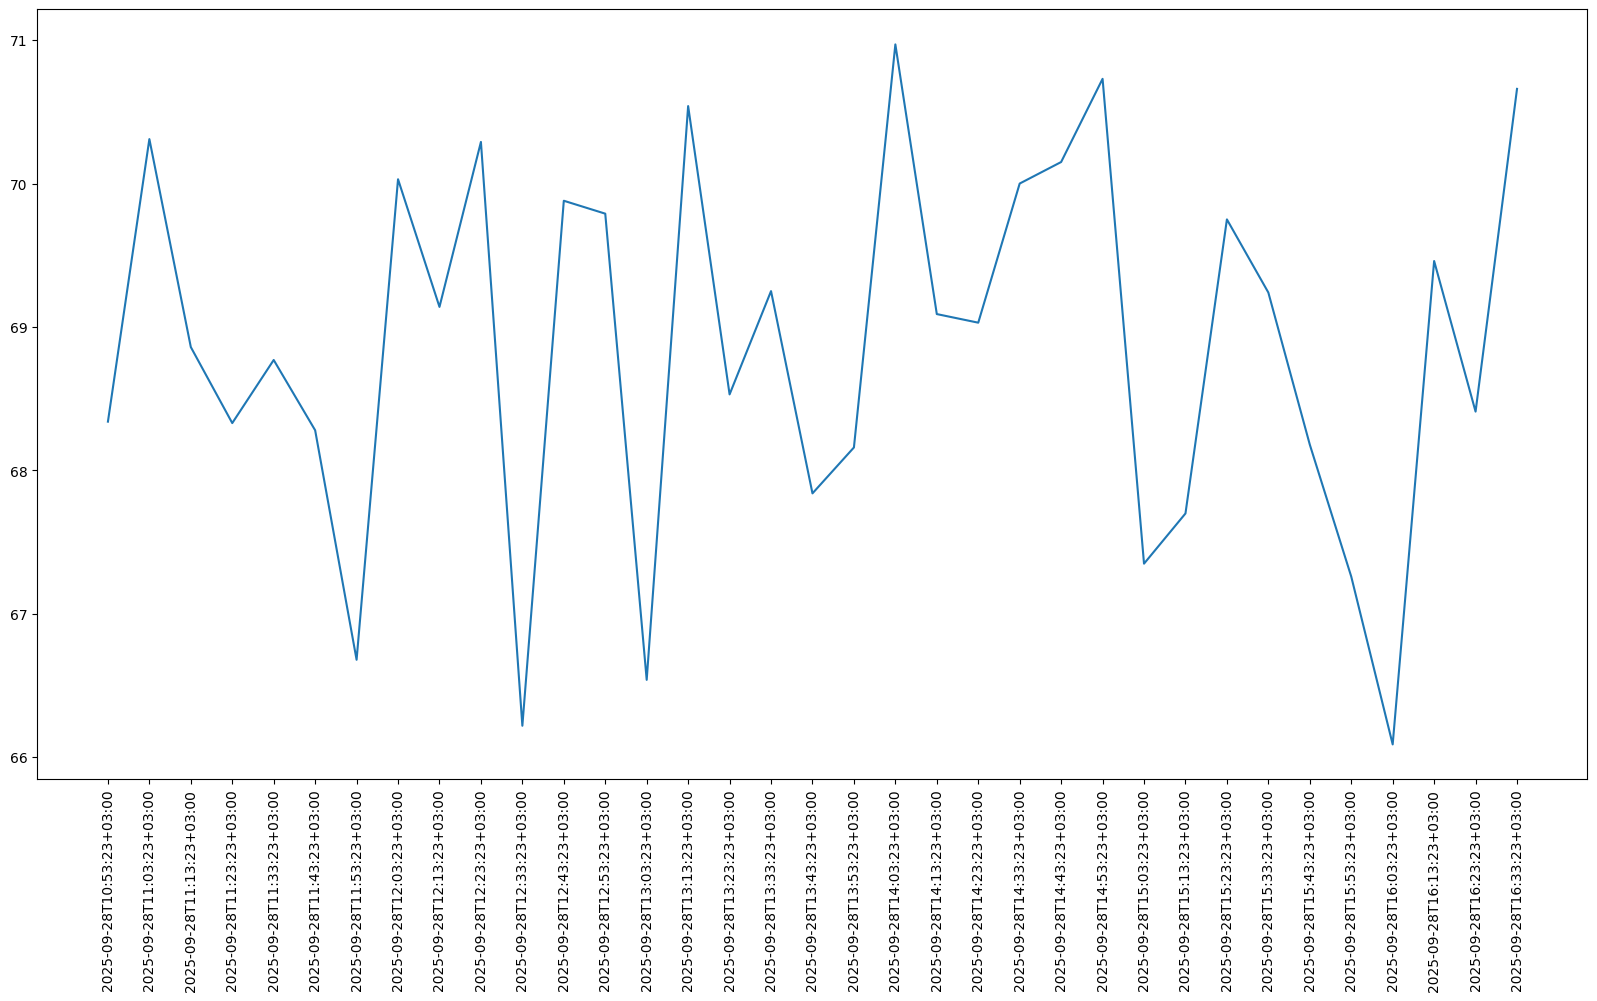

In [3]:
plt.figure(figsize=(20, 10))
plt.plot(df['date'], df['temperature'])
plt.xticks(rotation='vertical');

Після того, як дані прочитано, їх можна згрупувати за стовпцем «date», а для кожної дати витягти мінімальну та максимальну температури.

In [6]:
# Convert datetimes to pure dates so we can group by the date
df['date'] = pd.to_datetime(df['date']).dt.date

# Group the data by date so it can be analyzed by date
data_by_date = df.groupby('date')

# Get the minimum and maximum temperatures for each date
min_by_date = data_by_date.min()
max_by_date = data_by_date.max()

# Join the min and max temperatures into one dataframe and flatten it
min_max_by_date = min_by_date.join(max_by_date, on='date', lsuffix='_min', rsuffix='_max')
min_max_by_date = min_max_by_date.reset_index()

print(min_by_date)
print(max_by_date)

            temperature
date                   
2025-09-28        66.09
            temperature
date                   
2025-09-28        70.97


GDD можна розрахувати за допомогою стандартного рівняння GDD

In [5]:
def calculate_gdd(row):
    return ((row['temperature_max'] + row['temperature_min']) / 2) - base_temperature

# Calculate the GDD for each row
min_max_by_date['gdd'] = min_max_by_date.apply (lambda row: calculate_gdd(row), axis=1)

# Print the results
print(min_max_by_date[['date', 'gdd']].to_string(index=False))

      date   gdd
2025-09-28 19.53
